In [3]:
#Loading required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, r2_score,mean_absolute_error, mean_squared_error

In [5]:
#Dataset loading step
missed_payment_data=pd.read_csv("Credit_Score_Accuracy_Data.csv")

In [15]:
#Replacing null values with 0
missed_payment_data=missed_payment_data.fillna(0)

In [7]:
#Convert the dependent variable from object to numeric form
cond0=[
    missed_payment_data['Missed_Payments']=="On Time",
    missed_payment_data['Missed_Payments']=="Late"

]
val0=[0,1]
missed_payment_data['Missed_Payments_Category']=np.select(cond0,val0)

In [8]:
#Forming the independent and dependent variables
feature = missed_payment_data.drop(['Missed_Payments','Missed_Payments_Category'],axis=1)
target = missed_payment_data.loc[:,'Missed_Payments_Category']

In [9]:
#Formation of dummy variables
Merchant=pd.get_dummies(feature['Merchant'],drop_first=True)
Transaction_category=pd.get_dummies(feature['Transaction_category'],drop_first=True)
First_name=pd.get_dummies(feature['First_name'],drop_first=True)

In [10]:
#Formation of final independent variable dataset
feature.drop(['Merchant','Transaction_category','First_name'],axis=1,inplace=True)
feature = pd.concat([feature,Merchant,Transaction_category,First_name],axis=1)

In [11]:
#Dividing the dataset into test data and training data
X_train,X_test,Y_train,Y_test = train_test_split(feature, target ,test_size=0.20,random_state=40)

In [12]:
#Logistic Regression algorithm
import warnings
with warnings.catch_warnings(record=True):
    lgstc_reg_model = LogisticRegression()
    lgstc_reg_model.fit(X_train, Y_train)
    Y_pred = lgstc_reg_model.predict(X_test)
    print('Classification Report of the Logistic Regression algorithm is :\n', classification_report(Y_test, Y_pred))
    print('Mean Absolute Error of the Logistic Regression algorithm is :', mean_absolute_error(Y_test, Y_pred))
    print('Root Mean Squared Error of the Logistic Regression algorithm is :', np.sqrt(mean_squared_error(Y_test, Y_pred)))
    print('R-squared value of the Logistic Regression algorithm is :',r2_score(Y_test, Y_pred))

Classification Report of the Logistic Regression algorithm is :
               precision    recall  f1-score   support

           0       0.55      0.44      0.49      9797
           1       0.55      0.65      0.60     10203

    accuracy                           0.55     20000
   macro avg       0.55      0.54      0.54     20000
weighted avg       0.55      0.55      0.54     20000

Mean Absolute Error of the Logistic Regression algorithm is : 0.45295
Root Mean Squared Error of the Logistic Regression algorithm is : 0.6730156016022214
R-squared value of the Logistic Regression algorithm is : -0.8125469324653996


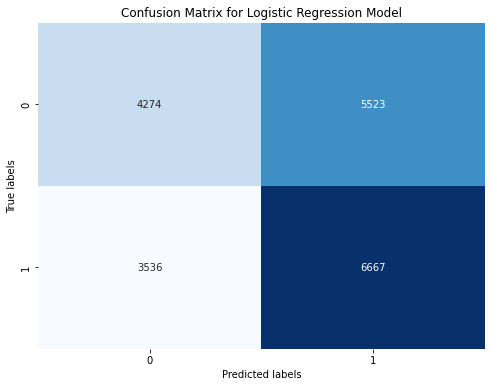

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


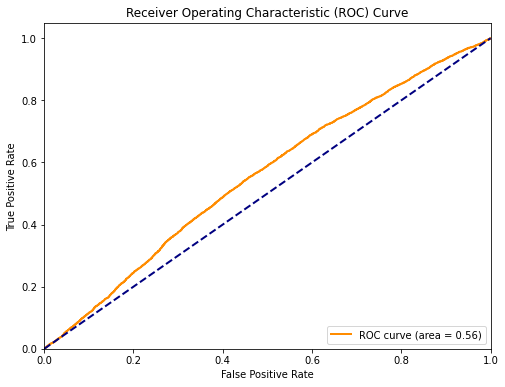

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Compute predicted probabilities
Y_prob = lgstc_reg_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
